## 2021: Week 15 - Restaurant Menu & Orders

We have another guest challenge creator with this week's challenge coming from Amalia. 

This week we want to analyse the orders that customers have made over a period of time in our restaurant Serendipia. In order to identify how much money we earn each day of the week and also to discover who our top customer is. We are going to be using calculations, pivots and aggregations so lots of the fundamental techniques that are used within data prep!

### Input

1. Menu - contains the menu of the restaurant (notice that the structure is not ideal)
    - 9 fields
    - 10 rows (11 + header)


2. Orders - each row represents the order a single customer have made at a certain date
    - 3 fields
    - 40 rows (41 + headers)

### Requirement
- Input the data
- Modify the structure of the Menu table so we can have one column for the Type (pizza, pasta, house plate), the name of the plate, ID, and Price
- Modify the structure of the Orders table to have each item ID in a different row
- Join both tables
- On Monday's we offer a 50% discount on all items. Recalculate the prices to reflect this
- For Output 1, we want to calculate the total money for each day of the week
- For Output 2, we want to reward the customer who has made the most orders for their loyalty. Work out which customer has ordered the most single items.

### Outputs

- Output 1 - Daily Sales
- Output 2 - Customer with most orders

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### input the data

In [290]:
data = pd.read_excel("./data/Menu and Orders.xlsx", sheet_name=["MENU", "Order"])
menu_df = data["MENU"].copy()
order_df = data["Order"].copy()

In [291]:
menu_df.head()

,Pizza,Pizza Price,Pizza ID,Pasta,Pasta Price,Pasta ID,House Plates,House Plates Prices,House Plates ID
0,Margherita,10,10101,Top Truffle Tagliatelle,14.0,20101.0,house fried chicken,11.0,30113.0
1,Vegan Viking,13,10102,Rock Star Rigatoni,15.0,20102.0,vegan fried chicken,11.0,30112.0
2,green god,12,10103,Slow Beef Rigatoni,14.0,20103.0,feta &watermelon salad,12.0,30111.0
3,rock star margherita,13,10104,Spicy Ragu Tagliatelle,12.0,20104.0,fried chicken salad,12.0,30110.0
4,samson,14,10105,Beetroot Gnocchi (Vegan),13.0,20105.0,NaN,NaN,NaN


In [292]:
order_df.head()

,Customer Name,Order Date,Order
0,Sallyanne Antonsen,2020-02-23,10101-30111-20104
1,Mordecai Lehrle,2021-02-10,20105-30112-10109-30111
2,Bee Masser,2020-12-23,20103-10103
3,Casey Ballintyne,2020-04-20,10107
4,Hadrian Rizzolo,2020-12-30,20102-20104


In [293]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pizza                10 non-null     object 
 1   Pizza Price          10 non-null     int64  
 2   Pizza ID             10 non-null     int64  
 3   Pasta                6 non-null      object 
 4   Pasta Price          6 non-null      float64
 5   Pasta ID             6 non-null      float64
 6   House Plates         4 non-null      object 
 7   House Plates Prices  4 non-null      float64
 8   House Plates ID      4 non-null      float64
dtypes: float64(4), int64(2), object(3)
memory usage: 848.0+ bytes


In [294]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  40 non-null     object        
 1   Order Date     40 non-null     datetime64[ns]
 2   Order          40 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ KB


### Modify the structure of the Menu table so we can have one column for the Type (pizza, pasta, house plate), the name of the plate, ID, and Price

In [295]:
pizza = menu_df.iloc[:, 0:3]
pizza["Type"] = "pizza"
pizza.columns = ["Name", "Price", "ID", "Type"]

pasta = menu_df.iloc[:, 3:6]
pasta["Type"] = "pasta"
pasta.columns = ["Name", "Price", "ID", "Type"]

house = menu_df.iloc[:, 6:]
house["Type"] = "house plate"
house.columns = ["Name", "Price", "ID", "Type"]

In [296]:
menu_df = pd.concat([pizza, pasta, house], axis=0).dropna()
menu_df

,Name,Price,ID,Type
0,Margherita,10.0,10101.0,pizza
1,Vegan Viking,13.0,10102.0,pizza
2,green god,12.0,10103.0,pizza
3,rock star margherita,13.0,10104.0,pizza
4,samson,14.0,10105.0,pizza
5,london field,14.0,10106.0,pizza
6,the hot don,15.0,10107.0,pizza
7,Truffle Hound,14.0,10108.0,pizza
8,Bianco,12.0,10109.0,pizza
9,Smokey Bandit,13.0,10110.0,pizza


### Modify the structure of the Orders table to have each item ID in a different row

In [297]:
order_df["Order"] = order_df["Order"].astype(str)
order_df.head()

,Customer Name,Order Date,Order
0,Sallyanne Antonsen,2020-02-23,10101-30111-20104
1,Mordecai Lehrle,2021-02-10,20105-30112-10109-30111
2,Bee Masser,2020-12-23,20103-10103
3,Casey Ballintyne,2020-04-20,10107
4,Hadrian Rizzolo,2020-12-30,20102-20104


In [298]:
import re

order_df["Order"] = order_df["Order"].map(lambda x: re.sub(r'[^0-9]', " ", x))
orders = order_df["Order"].map(lambda x: x.split(" ")).apply(pd.Series)
order_df = order_df.join(orders, how="left")
order_df = order_df.drop("Order", axis=1)
order_df.head()

,Customer Name,Order Date,0,1,2,3
0,Sallyanne Antonsen,2020-02-23,10101,30111,20104,NaN
1,Mordecai Lehrle,2021-02-10,20105,30112,10109,30111
2,Bee Masser,2020-12-23,20103,10103,NaN,NaN
3,Casey Ballintyne,2020-04-20,10107,NaN,NaN,NaN
4,Hadrian Rizzolo,2020-12-30,20102,20104,NaN,NaN


In [299]:
order_df = order_df.melt(id_vars=["Customer Name", "Order Date"],
                         var_name="Count", value_name="Item ID").dropna().reset_index(drop=True)
order_df = order_df.drop("Count", axis=1)
order_df.head()

,Customer Name,Order Date,Item ID
0,Sallyanne Antonsen,2020-02-23,10101
1,Mordecai Lehrle,2021-02-10,20105
2,Bee Masser,2020-12-23,20103
3,Casey Ballintyne,2020-04-20,10107
4,Hadrian Rizzolo,2020-12-30,20102


### Join both tables

In [300]:
order_df["Item ID"] = order_df["Item ID"].astype(int)
menu_df["ID"] = menu_df["ID"].astype(int)
order_df = order_df.merge(menu_df, how="left", left_on="Item ID", right_on="ID")
order_df = order_df.drop("ID", axis=1)

### Monday, we offer a 50% discount on all items. Recalculate the prices to reflect this

In [301]:
order_df["Day of Week"] = order_df["Order Date"].map(lambda x: x.day_of_week)
order_df["Day of Week"] = order_df["Day of Week"].replace({0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"})
order_df["Day of Week"].value_counts()

Wed    17
Tue    12
Sat    11
Sun     8
Fri     8
Mon     7
Thu     5
Name: Day of Week, dtype: int64

In [302]:
mon_price = order_df.loc[order_df["Day of Week"] == "Mon", "Price"] / 2
order_df.loc[mon_price.index, "Price"] = mon_price.values
order_df.loc[order_df["Day of Week"] == "Mon"]

,Customer Name,Order Date,Item ID,Name,Price,Type,Day of Week
3,Casey Ballintyne,2020-04-20,10107,the hot don,7.5,pizza,Mon
7,Osbert Sandercock,2020-08-31,10102,Vegan Viking,6.5,pizza,Mon
16,Renato Jerrems,2020-05-11,30113,house fried chicken,5.5,house plate,Mon
26,Brenden Ventom,2020-07-27,10104,rock star margherita,6.5,pizza,Mon
32,Leonore Heater,2020-06-15,10104,rock star margherita,6.5,pizza,Mon
51,Renato Jerrems,2020-05-11,20106,Chef's Meatballs,5.5,pasta,Mon
64,Renato Jerrems,2020-05-11,10108,Truffle Hound,7.0,pizza,Mon


### For Output 1, We want to calculate the total money for each day of the week

In [303]:
output_1 = (order_df.groupby(["Day of Week"])["Price"]
                    .sum()
                    .loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]]
                    .reset_index())

In [304]:
output_1

,Day of Week,Price
0,Mon,45.0
1,Tue,154.0
2,Wed,213.0
3,Thu,63.0
4,Fri,98.0
5,Sat,137.0
6,Sun,97.0


In [305]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

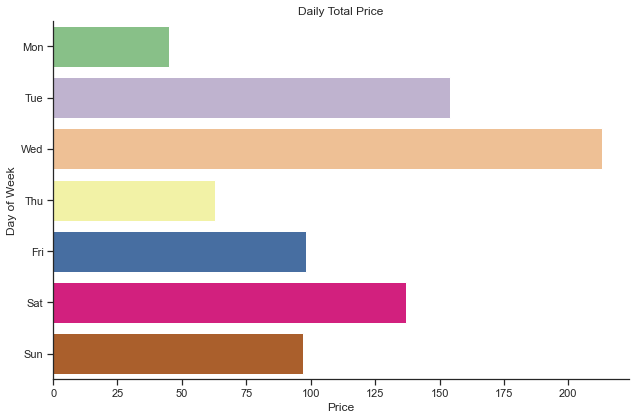

In [306]:
plt.figure(figsize=(9, 6))
sns.barplot(data=output_1, y="Day of Week", x="Price", orient="h", palette="Accent")
plt.title("Daily Total Price")
plt.tight_layout()
plt.show()

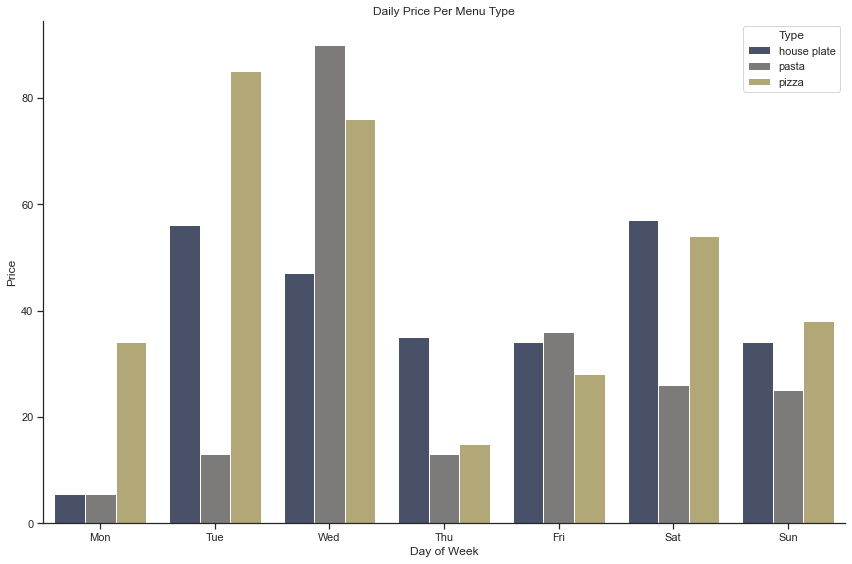

In [307]:
tmp = (order_df.groupby(["Day of Week", "Type"])
               ["Price"]
               .sum()
               .loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]]
               .reset_index())

plt.figure(figsize=(12, 8))
sns.barplot(data=tmp, x="Day of Week", y="Price", 
            hue="Type", orient="v", palette="cividis")
plt.title("Daily Price Per Menu Type")
plt.tight_layout()
plt.show()

### We want to reward the customer who has made the most orders for their loyalty
- Work out which customer has ordered the most single items

In [308]:
top_5_cust = (order_df.groupby(["Customer Name"])
                           ["Item ID"]
                           .count()
                           .sort_values(ascending=False)[:5])
top_5_cust = top_5_cust.reset_index().rename(columns={"Item ID": "Order Count"})

In [309]:
top_5_cust

,Customer Name,Order Count
0,Mordecai Lehrle,4
1,Wenda Beese,3
2,Sallyanne Antonsen,3
3,Renato Jerrems,3
4,Maria Lenden,3


In [310]:
output_1.to_csv("./output/Week14_output_1.csv")
top_5_cust.to_csv("./output/Week14_output_2.csv")